In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
Titanic_data = pd.read_csv('/kaggle/input/test-file/tested.csv')

Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:


Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
Titanic_data.shape

(418, 12)

In [5]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
Titanic_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
Titanic_data['Cabin'].fillna("Unknown", inplace = True)
Titanic_data['Fare'].fillna(Titanic_data['Fare'].mean(), inplace = True)
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace = True)

Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,Unknown,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,Unknown,S


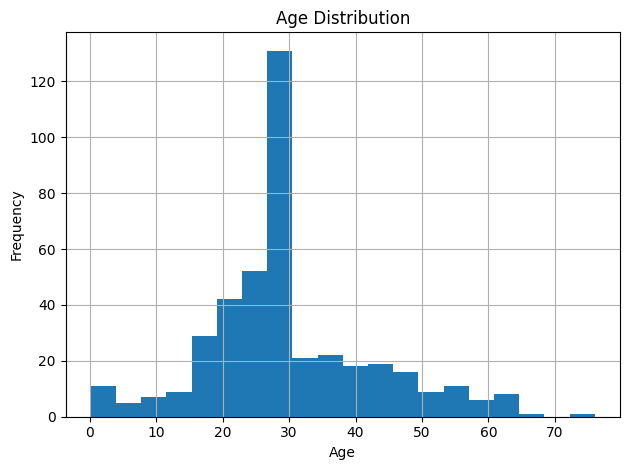

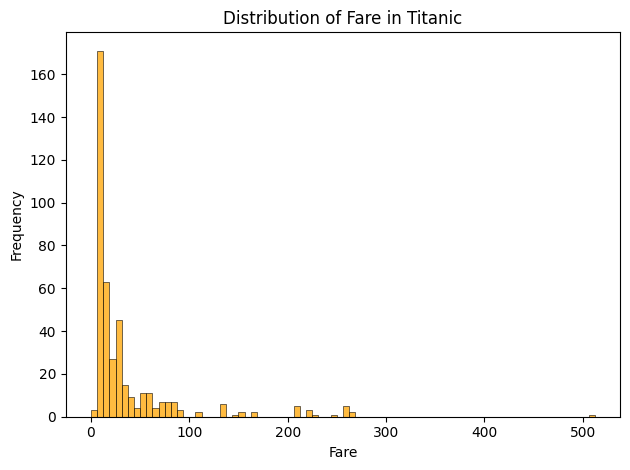

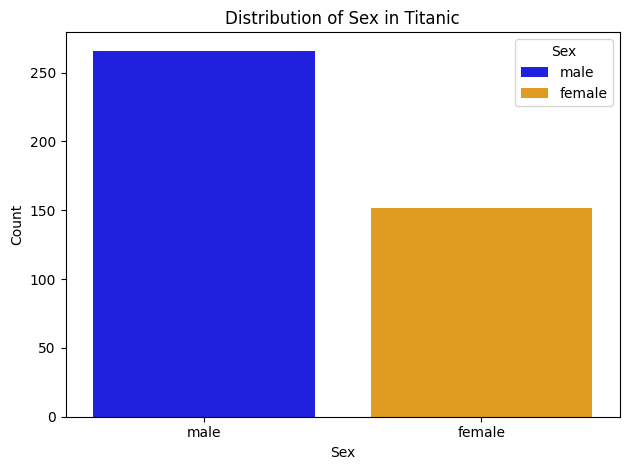

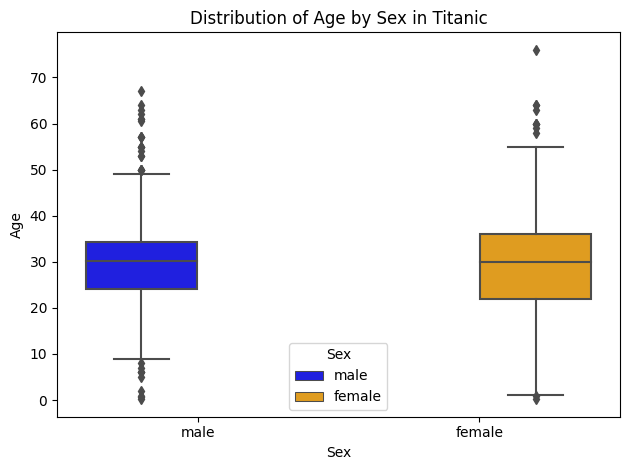

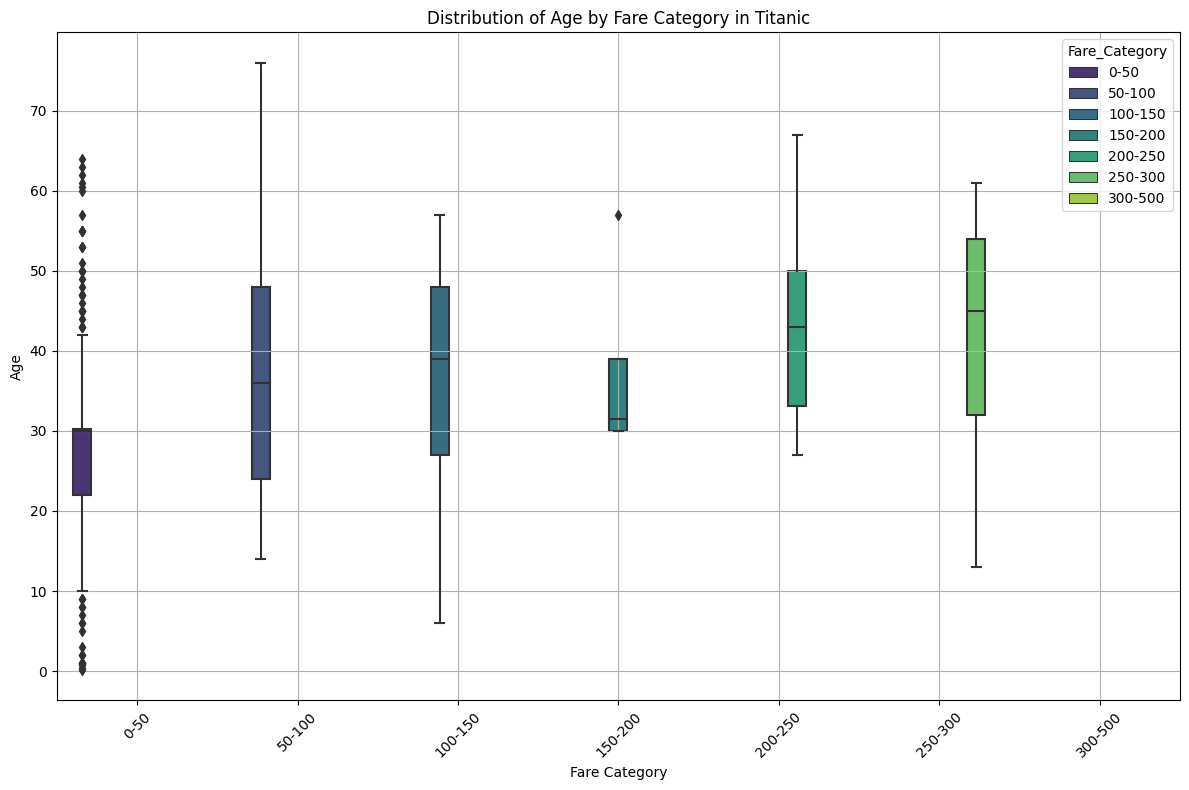

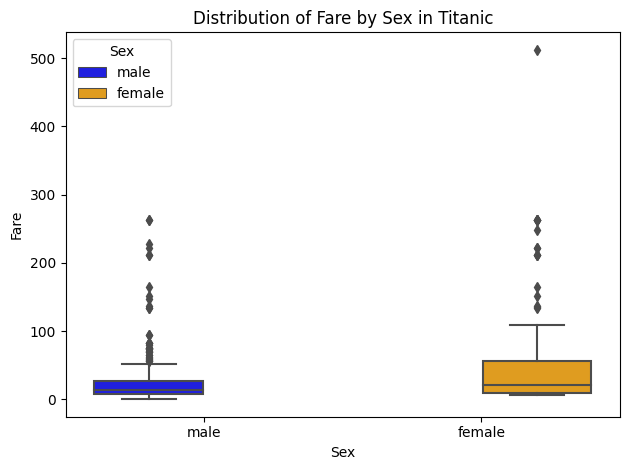

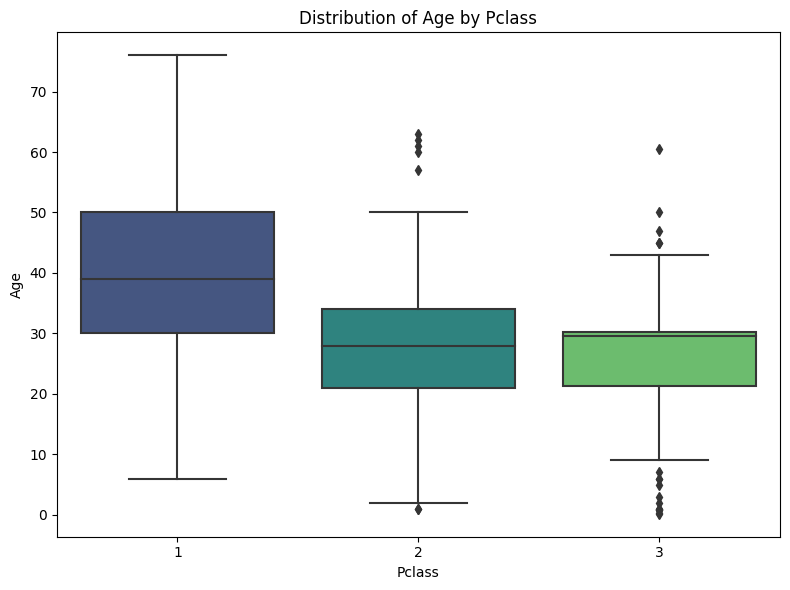

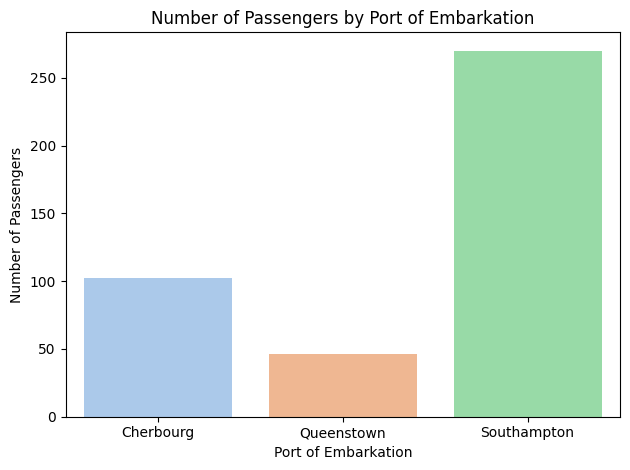

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram for Age Distribution
plt.hist(Titanic_data['Age'], bins=20)  
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)  
plt.tight_layout()
plt.show()

# Plotting histogram for Distribution of Fare in Titanic
sns.histplot(data=Titanic_data, x='Fare', color='orange')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare in Titanic')
plt.tight_layout()
plt.show()

# Plotting graph for Distribution of Sex in Titanic
Sex_counts = Titanic_data['Sex'].value_counts()

sns.barplot(x=Sex_counts.index, y=Sex_counts.values, hue=Sex_counts.index, palette=["blue", "orange"], dodge=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in Titanic')
plt.tight_layout()
plt.show()

# Creating a box plot for Distribution of Age by Sex in Titanic
sns.boxplot(x='Sex', y='Age', data=Titanic_data, hue='Sex', palette=['blue', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age by Sex in Titanic')
plt.tight_layout()
plt.show()

# Creating a box plot for Distribution of Age by Fare in Titanic

# Create Fare categories
bins = [0, 50, 100, 150, 200, 250, 300, 500]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-500']
Titanic_data['Fare_Category'] = pd.cut(Titanic_data['Fare'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))

sns.boxplot(x='Fare_Category', y='Age', data=Titanic_data, hue='Fare_Category', palette='viridis')
plt.xlabel('Fare Category')
plt.ylabel('Age')
plt.title('Distribution of Age by Fare Category in Titanic')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines if needed
plt.tight_layout()
plt.show()

# Creating a box plot for Distribution of Fare by Sex in Titanic
sns.boxplot(x='Sex', y='Fare', data=Titanic_data, hue='Sex', palette=['blue', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.title('Distribution of Fare by Sex in Titanic')
plt.tight_layout()
plt.show()


# Boxplot of Age by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(data=Titanic_data, x='Pclass', y='Age', palette='viridis')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Distribution of Age by Pclass')
plt.tight_layout()
plt.show()

# Filter passengers by port of embarkation
cherbourg_passengers = Titanic_data[Titanic_data['Embarked'] == 'C']
queenstown_passengers = Titanic_data[Titanic_data['Embarked'] == 'Q']
southampton_passengers = Titanic_data[Titanic_data['Embarked'] == 'S']

# Get the counts of passengers for each port
cherbourg_count = len(cherbourg_passengers)
queenstown_count = len(queenstown_passengers)
southampton_count = len(southampton_passengers)

# Create a bar plot
sns.barplot(x=['Cherbourg', 'Queenstown', 'Southampton'], y=[cherbourg_count, queenstown_count, southampton_count], palette='pastel')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Port of Embarkation')
plt.tight_layout()
plt.show()

In [9]:
# Subset the data for male survivors
male_survivors = Titanic_data[(Titanic_data['Sex'] == 'male') & (Titanic_data['Survived'] == 1)]

# Subset the data for female survivors
female_survivors = Titanic_data[(Titanic_data['Sex'] == 'female') & (Titanic_data['Survived'] == 1)]

# Get the counts
num_male_survivors = len(male_survivors)
num_female_survivors = len(female_survivors)

# Print the counts
print("Number of Male Survivors:", num_male_survivors)
print("Number of Female Survivors:", num_female_survivors)


Number of Male Survivors: 0
Number of Female Survivors: 152


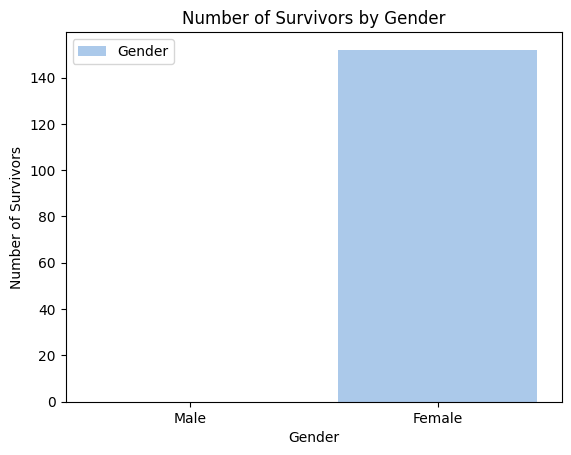

In [10]:
# Create a bar plot
sns.barplot(x=['Male', 'Female'], y=[num_male_survivors, num_female_survivors], hue=['Gender', 'Gender'], palette='pastel')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Gender')

# Show the plot
plt.show()

In [11]:
Titanic_data.groupby('Sex')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1.0,2.144737,30.272400,0.565789,0.598684,49.747699
male,0.0,2.334586,30.272699,0.379699,0.274436,27.558326


In [12]:
Titanic_data.groupby('Embarked')[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()

,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,
C,1.794118,33.862273,0.421569,0.382353,66.259765
Q,2.869565,29.816134,0.195652,0.021739,10.957700
S,2.340741,28.994255,0.500000,0.459259,28.257832


C = Cherbourg Q = Queenstown S = Southampton

Pclass = Passenger class

SibSp: Number of siblings

Parch: Parents and children



Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



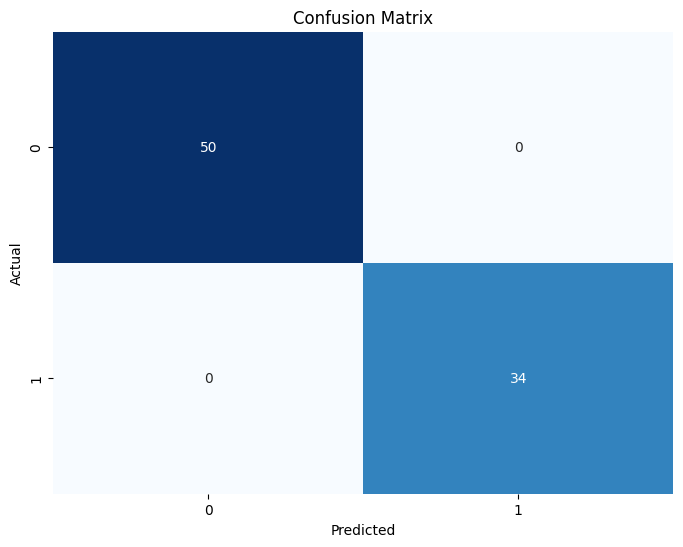

In [13]:
                                          ###Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Data preprocessing

Titanic_data['Sex_encoded'] = Titanic_data['Sex'].replace({'male' : 0 , 'female' : 1})

# Define your features (X) and target (y)
X = Titanic_data[['Age', 'Pclass', 'Sex_encoded']]
y = Titanic_data['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()